In [408]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("E:/EBAC/Material/10 - Modelos de regresión lineal y series de tiempo")

In [409]:
data_house = pd.read_csv("kc_house_data.csv")
data_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [410]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [411]:
data_house["Intercepto"] = 1
data_house = data_house[["Intercepto", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "yr_built", "sqft_living15", "sqft_lot15"]]
print(data_house.shape)
data_house.head()

(21613, 15)


,Intercepto,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,1,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1690,7639
2,1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,2720,8062
3,1,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,1360,5000
4,1,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,1800,7503


In [412]:
##, , , , , 

In [413]:
Xdata = data_house[["Intercepto", "bedrooms", "bathrooms", "sqft_living", "waterfront", "view", "condition", "grade", "sqft_lot", "floors", "sqft_above", "yr_built", "sqft_living15", "sqft_lot15"]].values
Ydata = data_house[["price"]].values

In [414]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size = 0.30, random_state=1)

In [415]:
X = X_train
Y = Y_train

In [416]:
# Opcion de formato numerico
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [417]:
XT_X = np.matmul(np.matrix.transpose(X), X)

In [418]:
XT_X_inv = np.linalg.inv(XT_X)

In [419]:
XT_Y = np.matmul(np.matrix.transpose(X), Y)

In [420]:
betas = np.matmul(XT_X_inv, XT_Y)
betas

array([[6233524.831323],
       [-34981.645716],
       [44452.053283],
       [159.083283],
       [567566.675566],
       [41728.788872],
       [17099.355296],
       [119256.271171],
       [-0.020600],
       [30359.292761],
       [-5.053054],
       [-3584.174161],
       [23.321091],
       [-0.485498]])

In [421]:
# Calculo de TSS (Suma total de cuadrados)
TSS = np.matmul(np.matrix.transpose(Y), Y) - len(Y)*(Y.mean()**2)
TSS

array([[1900668073054776.000000]])

In [422]:
# Calculo del ESS (Suma explicada de cuadrados)
ESS = np.matmul(np.matmul(np.matrix.transpose(betas), np.matrix.transpose(X)), np.matmul(X,betas)) - len(Y)*(Y.mean()**2)
ESS

array([[1240221837700666.000000]])

In [423]:
# Calculo de RSS (Residuales al Cuadrado)
RSS = TSS - ESS
RSS

array([[660446235354110.000000]])

In [424]:
# Calculo del Coeficiente de Detminacion R Cuadrada
RSq = 1 - RSS / TSS
RSq

array([[0.652519]])

In [425]:
# Calculo del Coeficiente de Determinacion R Cuadrada Ajustada
RSqAj = 1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1))
RSqAj

array([[0.652220]])

In [426]:
# Reporte Automatizado de la regresion en Python
regressor = sm.OLS(Y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2183.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:48:52   Log-Likelihood:            -2.0679e+05
No. Observations:               15129   AIC:                         4.136e+05
Df Residuals:                   15115   BIC:                         4.137e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.234e+06   1.51e+05     41.263      0.0

In [427]:
# Aplicacion sobre la base de prueba
Y_pred = np.matmul(X_test, betas)
Y_pred

array([[726777.626392],
       [313605.191589],
       [845732.451417],
       ...,
       [369345.901583],
       [2110397.620360],
       [883142.623181]])

In [428]:
# Calculo de residuales
Resid = Y_test - Y_pred
Resid

array([[-267777.626392],
       [131394.808411],
       [211267.548583],
       ...,
       [-139345.901583],
       [-430397.620360],
       [-590142.623181]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

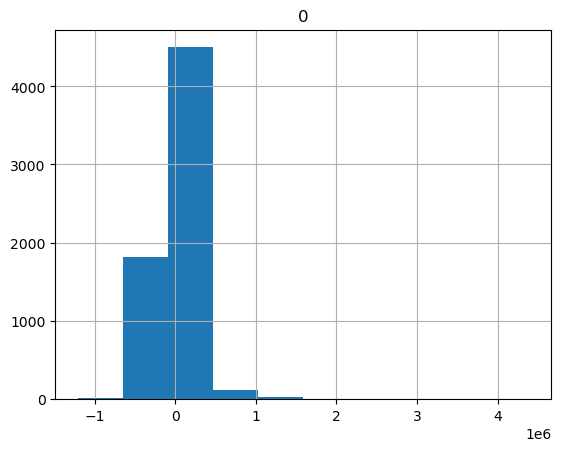

In [429]:
# Grafico del histograma de residuales para la base de prueba
df = pd. DataFrame(Resid)
df.hist()

In [430]:
print("Coeficiente R cuadrado", r2_score(Y_test, Y_pred))

Coeficiente R cuadrado 0.6542001594746465
